In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
city_data.head()
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()
# Combine the data into a single dataset

combined_data = pd.merge(ride_data, city_data, on = ['city','city'])
combined_data.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

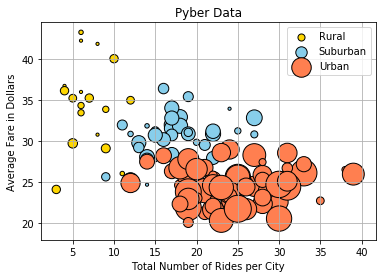

In [10]:
# Obtain the x and y coordinates for each of the three city types

city_data = combined_data.groupby('city')
#print(city_data.head())

#Rural
rural_data = combined_data[combined_data['type']=='Rural']
rural_data

rural_grouped = rural_data.groupby('city')

rural_mean = rural_grouped['fare'].mean()
rural_mean

rural_rides = rural_grouped['ride_id'].count()
rural_rides

rural_drivers = rural_grouped['driver_count'].mean()
rural_drivers

#Suburban
suburban_data = combined_data[combined_data['type']=='Suburban']
suburban_data.head()

suburban_grouped = suburban_data.groupby('city')

suburban_mean = suburban_grouped['fare'].mean()
suburban_mean

suburban_rides = suburban_grouped['ride_id'].count()
suburban_rides

suburban_drivers = suburban_grouped['driver_count'].mean()
suburban_drivers

#Urban
urban_data = combined_data[combined_data['type']=='Urban']
urban_data.head()

urban_grouped = urban_data.groupby('city')

urban_mean = urban_grouped['fare'].mean()
urban_mean

urban_rides = urban_grouped['ride_id'].count()
urban_rides

urban_drivers = urban_grouped['driver_count'].mean()
urban_drivers

x_axis_rural= rural_rides
x_axis_suburban = suburban_rides
x_axis_urban = urban_rides

y_axis_rural = rural_mean
y_axis_suburban = suburban_mean
y_axis_urban = urban_mean

# Build the scatter plots for each city types

rural = plt.scatter(x_axis_rural, y_axis_rural, s= rural_drivers * 10, edgecolors='black', label= 'Rural',c = 'gold')
suburban = plt.scatter(x_axis_suburban, y_axis_suburban, s = suburban_drivers * 10, edgecolors='black', label = 'Suburban', c = 'skyblue')
urban = plt.scatter(x_axis_urban, y_axis_urban, s = urban_drivers * 10, edgecolors='black', label = 'Urban', c = 'coral')

# Incorporate the other graph properties

plt.grid()
plt.title('Pyber Data')
plt.ylabel('Average Fare in Dollars')
plt.xlabel('Total Number of Rides per City')

# Create a legend

plt.legend(handles=[rural, suburban, urban], loc="best")

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../bubblechart")

In [11]:
# Show plot
plt.show()

## Total Fares by City Type

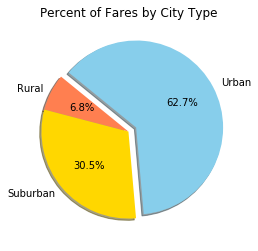

In [12]:
# Calculate Ride Percents

total_fares_type = city_data['fare'].sum()
total_fares= total_fares_type.sum()

#print(total_fares_type)

rural_fares = rural_data['fare'].sum()
rural_fares
rural_fares_percent = (rural_fares/total_fares)*100
rural_fares_percent


suburban_fares = suburban_data['fare'].sum()
suburban_fares_percent= (suburban_fares/total_fares)*100

urban_fares = urban_data['fare'].sum()
urban_fares_percent = (urban_fares/total_fares) * 100

# Build Pie Chart

labels = ['Urban','Rural','Suburban']
sizes = [(urban_fares_percent),( rural_fares_percent), (suburban_fares_percent)]
explode = (.1,0,0)
colors = ('skyblue','coral', 'gold', )
plt.pie(sizes, explode, labels=labels, autopct='%1.1f%%', shadow = True, startangle = 275, colors= colors)
plt.title( 'Percent of Fares by City Type')

# # # Save Figure
plt.savefig("../fares")
# # Calculate Type Percents

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

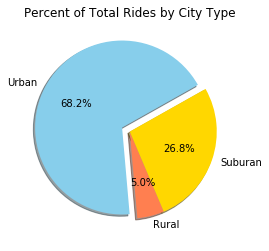

In [5]:
rides_total = combined_data.groupby(['type'])['ride_id'].sum()/combined_data['ride_id'].sum() * 100

# Build Pie Chart

labels = ['Rural','Suburan','Urban']
#sizes = [(percent_urban),( percent_rural), (percent_suburban)]
explode = (0,0,0.1)
colors = ('coral', 'gold', 'skyblue')
plt.pie(rides_total, explode, labels=labels, autopct='%1.1f%%', shadow = True, startangle = 275, colors=colors)
plt.title( 'Percent of Total Rides by City Type')

# Save Figure
plt.savefig("../rides")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64


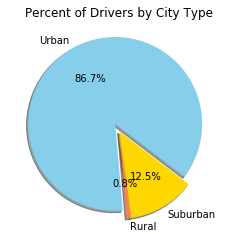

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Driver Percents

city_type = combined_data.groupby(['type'])
city_type.head()
driver_city = city_type['driver_count'].sum()
driver_city
drivers_total = driver_city/combined_data['driver_count'].sum() * 100
print(drivers_total)

# Build Pie Chart

labels = ['Rural','Suburban','Urban']
explode = [0,0,.1]
colors = ('coral', 'gold', 'skyblue')

plt.pie(drivers_total, explode, labels=labels, autopct='%1.1f%%', shadow = True, startangle = 275, colors=colors)
plt.title('Percent of Drivers by City Type')

plt.show()

#Save Figure
plt.savefig("../drivers")

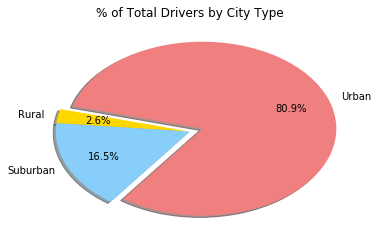

In [6]:
# Show Figure
plt.show()